In [5]:
import pandas as pd
import numpy as np
import datetime
from math import pi, ceil

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

datapath = './data/'

## Import DATA

In [14]:
def load_playlist(playlist='chill_playlist.h5'):
    '''
    Takes in the path of the data.
    Reads the data, convertes added_at to a datetime object and extract year and month to new column.
    Also standardise the tempo to between 0 and 1.
    Returns a dataframe.
    '''
    
#     read data
    df_playlist = pd.read_hdf(datapath + playlist, key='df')
    df_playlist.drop(['analysis_url', 'track_href', 'uri', 'type'], axis=1, inplace=True)
    
#     convert to datetime, extrated year and month from added_at
    df_playlist['added_at'] = pd.to_datetime(df_playlist['added_at'])
    df_playlist['added_year'] = df_playlist['added_at'].apply(lambda x : x.year)
    df_playlist['added_month'] = df_playlist['added_at'].apply(lambda x : x.month)
    
    df_playlist['tempo_01'] = df_playlist['tempo'] / df_playlist['tempo'].max()
    
    return df_playlist

In [15]:
df_saved = load_playlist()
print(df_saved.shape)

(306, 21)


In [16]:
df_saved.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,duration_ms,time_signature,added_at,song_title,artists,uploaded_by,added_year,added_month,tempo_01
68,0.587,0.107,3,-18.165,1,0.0779,0.8550,0.0000,0.1980,0.344,...,7JK2tn5VBd1I8hlZ8bYSeU,144000,4,2020-08-25 10:42:31+00:00,Vacío,Inazio,npeas,2020,8,0.619450
46,0.413,0.492,3,-11.089,1,0.0401,0.8690,0.0394,0.1300,0.335,...,1mwchUBzZHx9tAYUsEUYnX,210125,4,2019-12-21 12:23:48+00:00,Thirty-One,Pajaro Sunrise,npeas,2019,12,0.401260
1,0.561,0.678,8,-4.230,1,0.0324,0.0996,0.0000,0.1250,0.662,...,1MXzojJav1N4cREWTFm1iZ,219355,4,2020-12-11 12:03:51+00:00,+ (MÁS),"Aitana,Cali Y El Dandee",npeas,2020,12,0.773512
30,0.678,0.714,4,-7.488,1,0.0305,0.5410,0.0000,0.0796,0.968,...,7IoKOYco3gMZTV2E3s5uJj,165747,4,2019-11-28 13:48:25+00:00,Tiene Que Haber de Tó,Albertucho,npeas,2019,11,0.691140
39,0.645,0.889,7,-6.660,1,0.0582,0.1300,0.0000,0.1110,0.775,...,0XiMCSR5uA5Qj1y9ZTz89w,204187,4,2020-05-16 15:33:59+00:00,Viva la Libertad,Pedro Pastor,npeas,2020,5,0.517818


## Finding out changes in taste and preferences


In [19]:
df_grp_ym = df_saved.groupby(['added_year','added_month']).mean().reset_index()
df_grp_ym = df_grp_ym[(df_grp_ym['added_year'] > 2017) & (df_grp_ym['added_year'] <= 2020)]
df_grp_ym['added_at'] = df_grp_ym.apply(lambda row: datetime.date(int(row['added_year']), int(row['added_month']), 1), axis=1)
df_grp_ym.head()

,added_year,added_month,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,tempo_01,added_at
0,2019,11,0.572774,0.590013,6.741935,-9.036226,0.774194,0.054252,0.429866,0.000242,0.164155,0.501587,126.215774,225170.161290,3.903226,0.610024,2019-11-01
1,2019,12,0.620174,0.623043,5.043478,-8.039826,0.826087,0.049630,0.295888,0.048346,0.145713,0.555957,116.800391,211720.826087,4.000000,0.564518,2019-12-01
2,2020,1,0.605455,0.649727,5.363636,-5.891545,0.818182,0.045936,0.270912,0.000015,0.235382,0.568818,116.166091,212992.636364,3.909091,0.561452,2020-01-01
3,2020,2,0.592944,0.818500,6.111111,-4.359111,0.888889,0.074317,0.148714,0.000017,0.142122,0.706833,131.130333,197113.833333,4.000000,0.633777,2020-02-01
4,2020,3,0.570663,0.692547,5.523256,-6.283163,0.697674,0.054049,0.202268,0.004554,0.196120,0.608640,130.180221,210251.848837,3.872093,0.629185,2020-03-01


<Figure size 2160x1440 with 0 Axes>

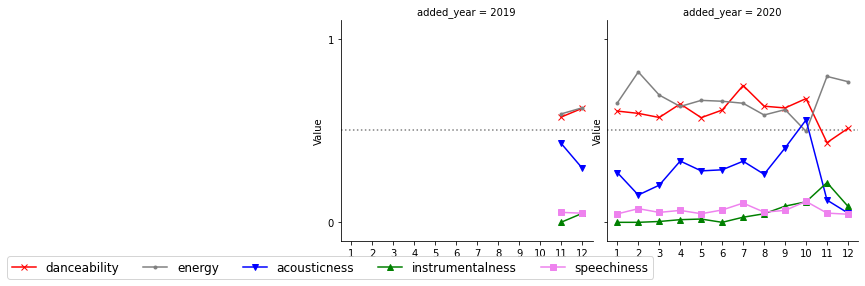

In [20]:

# sns.set(style="ticks")
plt.figure(figsize=(30,20))
grid = sns.FacetGrid(data=df_grp_ym, col="added_year", height=4)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0.5, ls=":", c=".5")

# Draw a line plot to show the average value per month
grid.map(plt.plot, "added_month", "danceability", marker="x", color='r', label='danceability')
grid.map(plt.plot, "added_month", "energy", marker=".", color='grey', label='energy')
grid.map(plt.plot, "added_month", "acousticness", marker="v", color='b', label='acousticness')
grid.map(plt.plot, "added_month", "instrumentalness", marker="^", color='g', label='instrumentalness')
grid.map(plt.plot, "added_month", "speechiness", marker="s", color='violet', label='speechiness')

# Adjust the tick positions and labels
grid.set(xticks=np.arange(13), yticks=[0, 1], 
         xlim=(0.5,12.5), ylim=(-0.1,1.1), 
         ylabel='Value', xlabel='')

# Adjust legend
plt.legend(loc='lower center', bbox_to_anchor=(-1.1, -0.2), ncol=5, fontsize=12)


plt.show()

## Filtering out to recent songs based on taste and preferences

In [23]:
df_recent = df_saved[(df_saved['added_year'] >= 2017) & (df_saved['added_year'] < 2020)]

In [24]:
df_recent.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,duration_ms,time_signature,added_at,song_title,artists,uploaded_by,added_year,added_month,tempo_01
52,0.863,0.704,11,-7.960,1,0.0397,0.00786,0.150000,0.2240,0.901,...,0CxATGg1KrVB0DZsHkw9a3,183865,4,2019-12-21 13:02:45+00:00,Te Quiero Igual,"Novedades Carminha,Alba Galocha",npeas,2019,12,0.555744
33,0.339,0.516,1,-7.102,1,0.0330,0.00343,0.016100,0.0843,0.178,...,0iM4pwkaMrJAGKHVcavitw,200400,4,2019-12-21 12:19:09+00:00,Stop The Clocks,L.A.,npeas,2019,12,0.984031
18,0.562,0.850,11,-5.092,1,0.0609,0.04870,0.000000,0.0912,0.581,...,1t9xsch2D9URgAFWuE7kc8,248867,4,2019-11-28 13:44:53+00:00,El Baile,IZAL,npeas,2019,11,0.724716
50,0.545,0.485,8,-9.941,1,0.1510,0.30000,0.001370,0.1190,0.341,...,2uhEKg8kIzpdvz4gyy6x8W,249173,4,2019-12-21 12:47:16+00:00,Only Love,Ben Howard,npeas,2019,12,0.388593
10,0.578,0.791,9,-5.758,1,0.0315,0.09750,0.000056,0.1180,0.162,...,3ztnp89aCU5OMQBlbIkEI8,275493,4,2019-11-28 13:41:24+00:00,Pequeña Gran Revolución,IZAL,npeas,2019,11,0.507687


In [25]:
df_recent.shape

(54, 21)

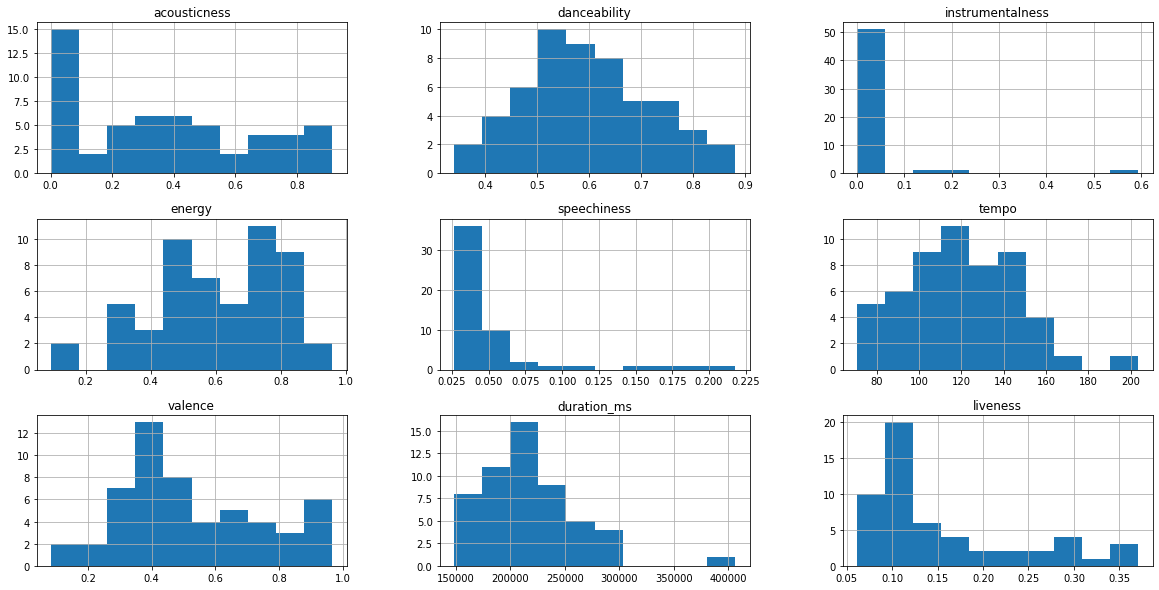

In [26]:
df_recent[['acousticness', 'danceability', 'instrumentalness', 
           'energy', 'speechiness','tempo','valence','duration_ms',
           'liveness']].hist(figsize=(20,10))
plt.show()

## Clustering similar songs together

In [27]:
cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']
df_cluster = df_recent[cluster_features]

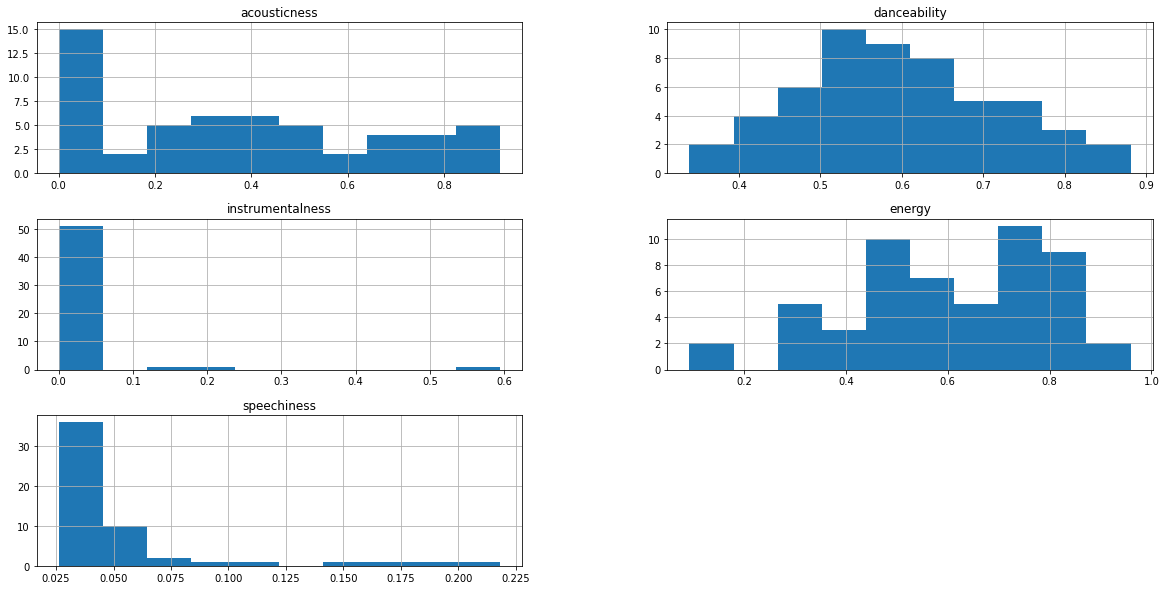

In [28]:
df_cluster.hist(figsize=(20,10))
plt.show()

In [29]:
X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [30]:
ss_dist = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, max_iter=10000, init='k-means++', random_state=123)
    km = km.fit(X)
    ss_dist.append(km.inertia_)

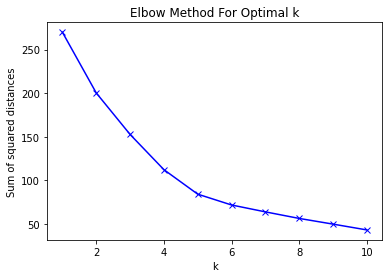

In [31]:
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
num_clusters = 5
kmeanModel = KMeans(n_clusters=num_clusters, max_iter=10000, init='k-means++', random_state=123).fit(X)

## Visualisation of cluster using PCA

In [33]:
pca = PCA(n_components=3, random_state=123)
pca_results = pca.fit_transform(X)

In [34]:
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()

0.8105085765861415


array([0.35720776, 0.58501589, 0.81050858])

In [35]:
df_scree = pd.DataFrame({'Component': ['1','2','3'],'Indiv':pca.explained_variance_ratio_})
df_scree['cum_sum'] = df_scree['Indiv'].cumsum()
df_scree

,Component,Indiv,cum_sum
0,1,0.357208,0.357208
1,2,0.227808,0.585016
2,3,0.225493,0.810509


<ipython-input-36-d00a5d6cb8c2>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,90,10), fontsize=12)


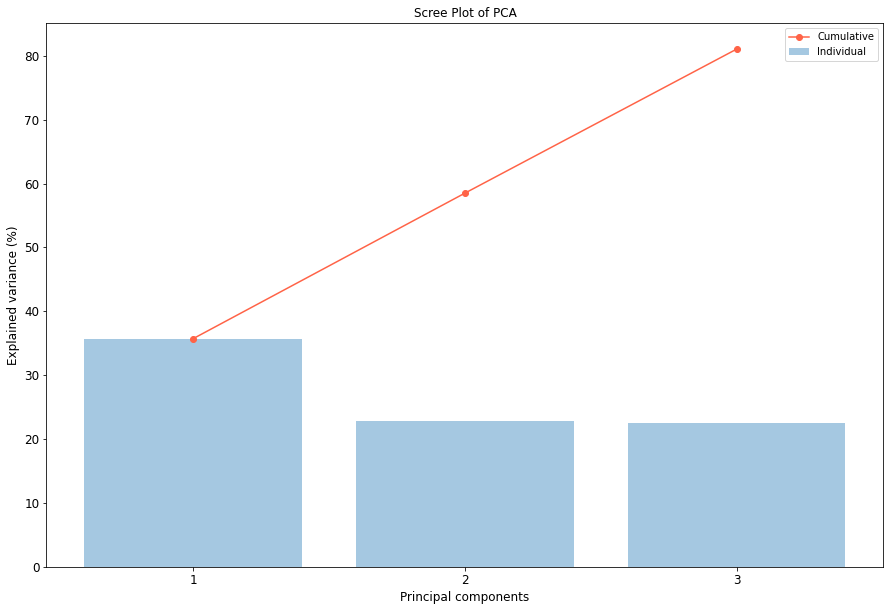

In [36]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, 
        label='Individual', axes=ax, alpha=0.4)
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum(), 
         label='Cumulative', color='tomato', axes=ax, marker='o')

ax.set_xticks(range(0,3))
ax.set_xticklabels(range(1,4), fontsize=12)
ax.set_yticklabels(range(0,90,10), fontsize=12)

plt.title('Scree Plot of PCA', fontsize=12)
plt.ylabel('Explained variance (%)', fontsize=12)
plt.xlabel('Principal components', fontsize=12)
plt.legend()
plt.show()

In [37]:
df_pca = pd.DataFrame(pca_results)
df_pca.columns = ['PC1', 'PC2','PC3']
df_pca['label'] = kmeanModel.labels_
df_pca.head()

,PC1,PC2,PC3,label
0,1.032207,-0.299319,0.062773,0
1,1.148828,-0.242907,0.118381,0
2,-0.575086,0.165696,-0.087173,3
3,-1.776605,0.148838,0.083638,3
4,-0.145995,-0.228507,-0.228448,3


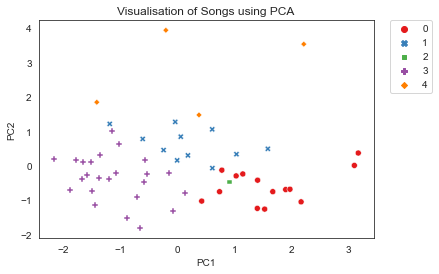

In [38]:
sns.set_style('white')
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', style='label', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Visualisation of Songs using PCA')
plt.show()

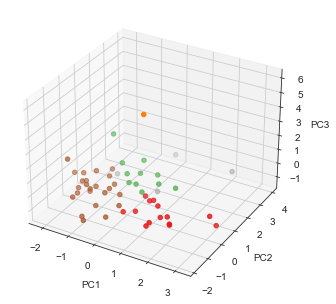

In [39]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
           c=df_pca['label'], cmap='Set1')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

## Visualisation of clusters using TSNE

In [40]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=123, learning_rate=190)
tsne_results = tsne.fit_transform(X)

In [41]:
df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2']
df_tsne['label'] = kmeanModel.labels_
df_tsne.head()

,D1,D2,label
0,-58.207546,29.440498,0
1,94.042381,60.261608,0
2,148.023483,-64.299332,3
3,-68.014725,70.295959,3
4,12.931715,-134.258575,3


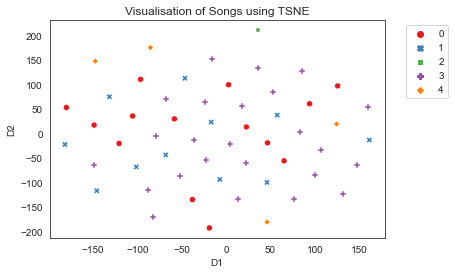

In [42]:
sns.set_style('white')
sns.scatterplot(data=df_tsne, x='D1', y='D2', hue='label', style='label', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Visualisation of Songs using TSNE')
plt.show()

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


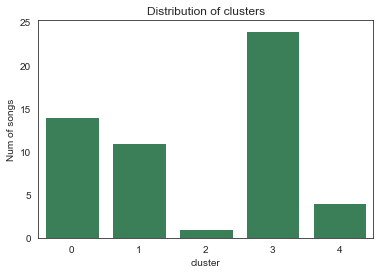

In [43]:
# assign label to recent dataframe
df_recent.loc[:,'cluster'] = kmeanModel.labels_
df_cluster_size = df_recent.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data=df_cluster_size, x='cluster', y='Num of songs', color='seagreen')
plt.title('Distribution of clusters')
plt.show()

## Song feature distribution compared to overall distribution

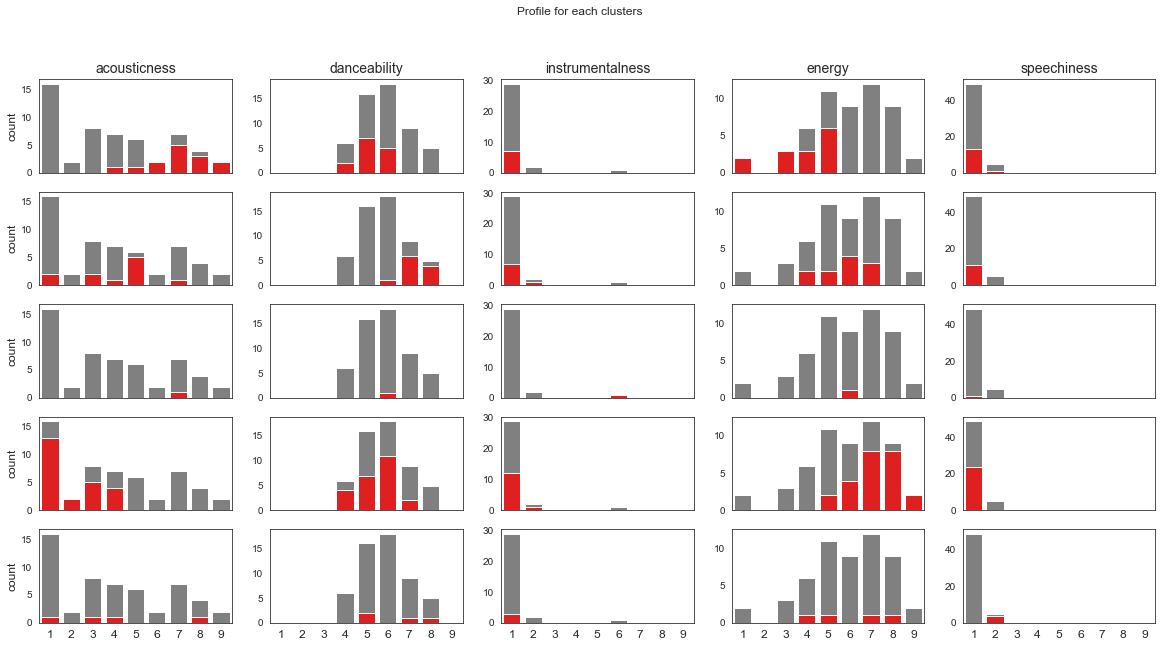

In [44]:

# set binning intervals of 0.1
bins = np.linspace(0,1,10)

# create subplots
num_features = len(cluster_features)
f, axes = plt.subplots(num_clusters, num_features, 
                       figsize=(20, 10), sharex='col')

# initialise 1st row. Representing cluster
row = 0
for cluster in np.sort(df_recent['cluster'].unique()):
#     filter cluster dataframe and reset column to 0 for 1st plot for the cluster
    df_cluster = df_recent[df_recent['cluster'] == cluster]
    col = 0
    
    for feature in cluster_features:
#         create binned count for all recent df and clustered df
        rec_grp = df_recent.groupby(pd.cut(df_recent[feature], bins)).size().reset_index(name='count')
        cluster_grp = df_cluster.groupby(pd.cut(df_cluster[feature], bins)).size().reset_index(name='count')
        
#         plot overall distribution and cluster distribution on the ax
        sns.barplot(data=rec_grp, x=feature, y='count', 
                    color='grey', ax=axes[row, col])
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='red', ax=axes[row, col])
        
#         configure ax
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1,10), fontsize=12)
        if col > 0:
            axes[row, col].set_ylabel('')
        else:
            axes[row, col].set_ylabel('count', fontsize=12)
        if row == 0:
            axes[row, col].set_title(feature, fontsize=14)        
        col += 1
    row += 1
    
f.suptitle('Profile for each clusters')
    
plt.show()


## Average song features per cluster

In [45]:
# calculate mean of each variable
radar_col = cluster_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = df_recent[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar

,cluster,acousticness,danceability,instrumentalness,energy,speechiness
0,0,0.717500,0.534714,0.002982,0.379743,0.042493
1,1,0.389233,0.754818,0.020815,0.569182,0.037945
2,2,0.756000,0.661000,0.594000,0.601000,0.026100
3,3,0.141859,0.539083,0.010545,0.749208,0.044371
4,4,0.411025,0.658000,0.000415,0.615250,0.180000


In [46]:
# https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)


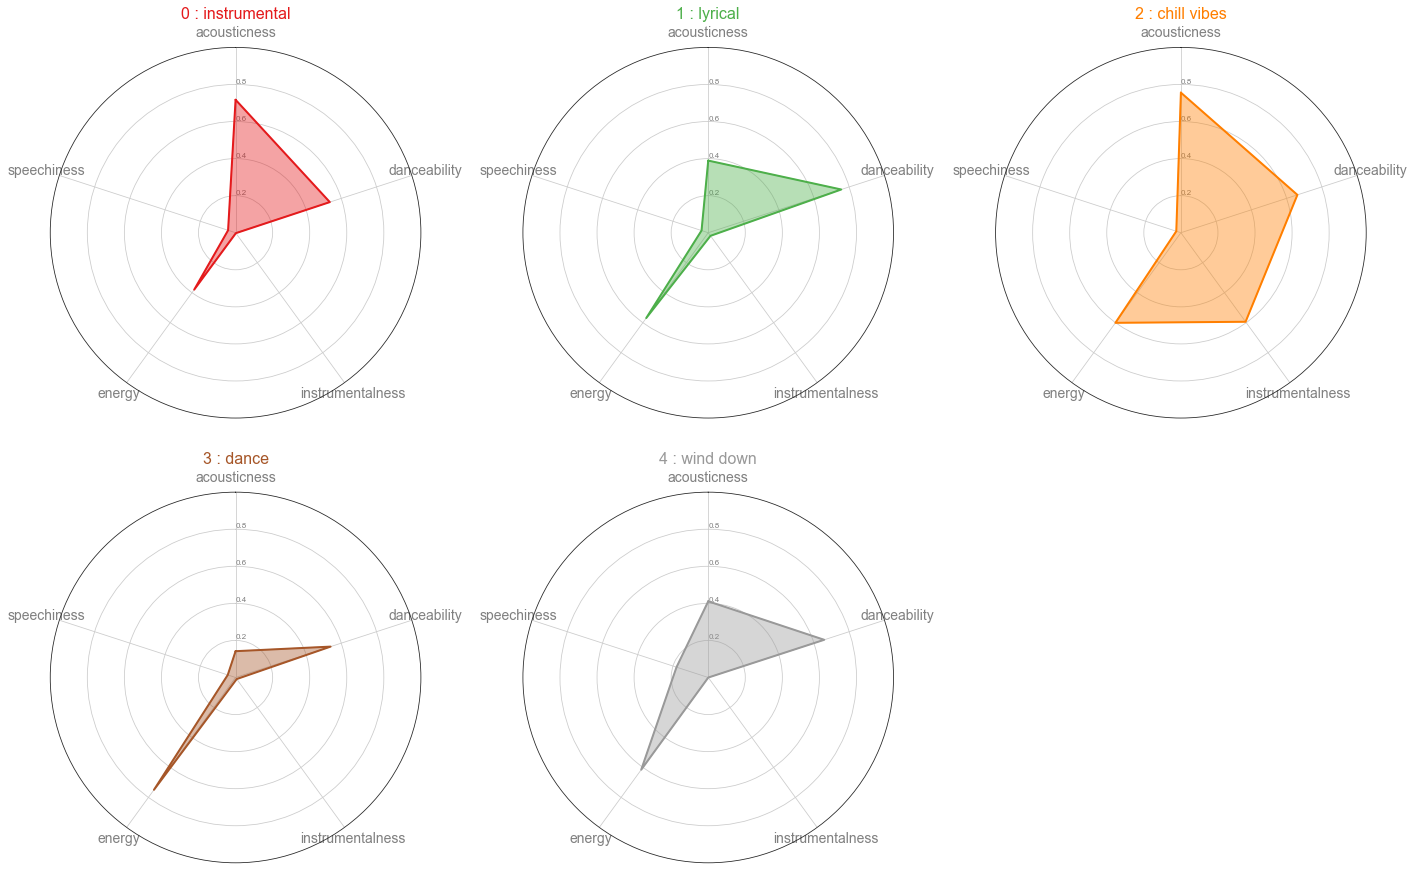

In [47]:
# initialize the figure
plt.figure(figsize=(24,15))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set1", len(df_radar.index))

# Create cluster name
title_list = ['instrumental', 'lyrical', 'chill vibes', 'dance', 'wind down']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))

    
# Show plot
plt.show()

## Sampling of songs in cluster

In [50]:
cluster_num = 1
df_cluster = df_recent[df_recent['cluster'] == cluster_num]
df_cluster[['song_title', 'artists']].sample(10)

,song_title,artists
51,Cariñito,Novedades Carminha
47,Eurohop,Pajaro Sunrise
52,Te Quiero Igual,"Novedades Carminha,Alba Galocha"
35,Living by the Ocean,L.A.
28,No Te Quiero Tanto,Andrés Suárez
42,086,Pajaro Sunrise
30,Tiene Que Haber de Tó,Albertucho
44,Long Forgotten Flowers,Pajaro Sunrise
5,El Burdel de las Sirenas,84
43,Kinda Fantastic,Pajaro Sunrise
